In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [115]:
data = pd.read_csv('/content/loans.csv')

In [116]:
data.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [23]:
data['fpStatus'].unique()

array([nan, 'Checked', 'No Payments', 'Rejected', 'No Schedule',
       'Skipped', 'Cancelled', 'Pending'], dtype=object)

In [ ]:
data.shape

(576682, 19)

In [117]:
# Assuming 'data' is your DataFrame and 'float_column' is the column with missing values
mean_value = data['apr'].mean()
data['apr'].fillna(mean_value, inplace=True)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loanId                            1000 non-null   object 
 1   anon_ssn                          1000 non-null   object 
 2   payFrequency                      1000 non-null   object 
 3   apr                               1000 non-null   float64
 4   applicationDate                   1000 non-null   object 
 5   originated                        1000 non-null   bool   
 6   originatedDate                    1000 non-null   object 
 7   nPaidOff                          1000 non-null   int64  
 8   approved                          1000 non-null   bool   
 9   isFunded                          1000 non-null   int64  
 10  loanAmount                        1000 non-null   int64  
 11  originallyScheduledPaymentAmount  1000 non-null   float64
 12  state  

In [118]:
# Assuming 'data' is your DataFrame and 'letter_column' is the column with missing values
mode_value = data['payFrequency'].mode()[0]
data['payFrequency'].fillna(mode_value, inplace=True)


In [119]:

print(data.isnull().sum())


loanId                                 256
anon_ssn                                 0
payFrequency                             0
apr                                      0
applicationDate                          0
originated                               0
originatedDate                      531637
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                            525913
clarityFraudId                      219831
hasCF                                    0
dtype: int64


In [120]:
# Assuming 'data' is your DataFrame and 'boolean_column' is the column with missing values
mode_value = data['fpStatus'].mode()[0]
data['fpStatus'].fillna(mode_value, inplace=True)


In [28]:
# Reset the index
data.reset_index(drop=True, inplace=True)


In [ ]:
data_no_missing = data.dropna()

In [ ]:
# Assuming 'data' is your DataFrame
data_no_missing = data.dropna(subset=['loanId'])


In [29]:
print(data.isnull().sum())

loanId                                 25
anon_ssn                                0
payFrequency                            0
apr                                     0
applicationDate                         1
originated                              1
originatedDate                      81075
nPaidOff                                4
approved                                1
isFunded                                1
loanStatus                             51
loanAmount                            306
originallyScheduledPaymentAmount        1
state                                  23
leadType                                1
leadCost                                1
fpStatus                                0
clarityFraudId                      33694
hasCF                                   1
dtype: int64


In [ ]:
# Assuming 'data' is your DataFrame and 'string_column' is the column with missing values
data_no_missing = data.dropna(subset=['loanId'])


In [110]:
print(data.isnull().sum())

loanId                                 256
anon_ssn                                 0
payFrequency                             0
apr                                      0
applicationDate                          0
originated                               0
originatedDate                      531637
nPaidOff                                24
approved                                 0
isFunded                                 0
loanStatus                             391
loanAmount                            2250
originallyScheduledPaymentAmount         0
state                                  132
leadType                                 0
leadCost                                 0
fpStatus                                 0
clarityFraudId                      219831
hasCF                                    0
dtype: int64


In [121]:
# Assuming 'data' is your DataFrame and 'letter_column' is the column with missing values
mode_value = data['payFrequency'].mode()[0]
data['payFrequency'].fillna(mode_value, inplace=True)

In [122]:
# Assuming 'data' is your DataFrame and 'boolean_column' is the column with missing values
mode_value = data['originatedDate'].mode()[0]
data['originatedDate'].fillna(mode_value, inplace=True)


In [123]:
# Check the column names to ensure accuracy


# Assuming 'float_column' is the correct column name, handle missing values
data['nPaidOff'] = data['nPaidOff'].fillna(data['nPaidOff'].mean())


In [131]:
# Assuming 'data' is your DataFrame and 'string_column' is the column with missing values
mode_value = data['loanId'].mode()[0]
data['loanId'].fillna(mode_value, inplace=True)

In [125]:
# Assuming 'data' is your DataFrame and 'float_column' is the column with missing values
mean_value = data['loanAmount'].mean()
data['loanAmount'].fillna(mean_value, inplace=True)


In [126]:
# Assuming 'data' is your DataFrame and 'float_column' is the column with missing values
mean_value = data['loanAmount'].mean()
data['loanAmount'].fillna(mean_value, inplace=True)

In [127]:
# Assuming 'data' is your DataFrame and 'float_column' is the column with missing values
mean_value = data['loanAmount'].mean()
data['loanAmount'].fillna(mean_value, inplace=True)


In [128]:
# Assuming 'data' is your DataFrame and 'string_column' is the column with missing values
mode_value = data['clarityFraudId'].mode()[0]
data['clarityFraudId'] = data['clarityFraudId'].fillna(mode_value)


In [132]:
print(data.isnull().sum())

loanId                                   0
anon_ssn                                 0
payFrequency                             0
apr                                      0
applicationDate                          0
originated                               0
originatedDate                           0
nPaidOff                                 0
approved                                 0
isFunded                                 0
loanStatus                               0
loanAmount                               0
originallyScheduledPaymentAmount         0
state                                    0
leadType                                 0
leadCost                                 0
fpStatus                                 0
clarityFraudId                           0
hasCF                                    0
loan_fraud                          472510
dtype: int64


In [133]:
# Assuming 'data' is your DataFrame and 'LoanStatus' is the column representing loan status
data['loan_fraud'] = data['loanStatus'].map({
    'Paid Off Loan': 0,
    'Charged Off Paid Off': 0,
    'Settlement Paid Off': 0,
    'Rejected': 1,
    'Internal Collection': 1,
    'CSR Voided New Loan': 1,
    'Customer Voided New Loan': 1,
    'Credit Return Void': 1,
    'Pending Application Fee': 1,
    'Charged Off': 1
})

# If there are any other statuses, set them to NaN
data['loan_fraud'].fillna(value=np.nan, inplace=True)


In [ ]:
data.shape

(576682, 20)

In [134]:
data.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,loan_fraud
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,2015-02-20T19:40:33.329000,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,Checked,5669ef78e4b0c9d3936440e6,1,NaN
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,0.0
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,2015-02-20T19:40:33.329000,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,Checked,579eab11e4b0d0502870ef2f,1,NaN
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,2015-02-20T19:40:33.329000,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,Checked,555b1e95e4b0f6f11b267c18,1,NaN
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,2015-02-20T19:40:33.329000,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,Checked,5754a91be4b0c6a2bf424772,1,1.0


In [135]:
from sklearn.preprocessing import LabelEncoder



In [136]:
label_encoder = LabelEncoder()
data['anon-ssn_encoded'] = label_encoder.fit_transform(data['anon_ssn'])


In [47]:
data.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,loan_fraud,anon-ssn_encoded
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,2014-12-03T03:12:53.335000,0.0,False,0.0,...,500.0,978.27,IL,bvMandatory,6.0,Checked,5669ef78e4b0c9d3936440e6,1.0,NaN,62542
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1.0,...,3000.0,6395.19,CA,prescreen,0.0,Checked,569eb3a3e4b096699f685d64,1.0,0.0,23098
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,2014-12-03T03:12:53.335000,0.0,False,0.0,...,400.0,1199.45,MO,bvMandatory,3.0,Checked,579eab11e4b0d0502870ef2f,1.0,NaN,19669
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,2014-12-03T03:12:53.335000,0.0,False,0.0,...,500.0,1074.05,IL,bvMandatory,3.0,Checked,555b1e95e4b0f6f11b267c18,1.0,NaN,50906
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,2014-12-03T03:12:53.335000,0.0,False,0.0,...,350.0,814.37,NV,bvMandatory,3.0,Checked,5754a91be4b0c6a2bf424772,1.0,1.0,32666


In [137]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data = data.drop(columns=['anon_ssn'])


In [ ]:
data['leadType_encoded'].dtypes

In [138]:
label_encoder = LabelEncoder()
data['leadType_encoded'] = label_encoder.fit_transform(data['leadType'])


In [139]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data = data.drop(columns=['leadType'])


In [140]:
label_encoder = LabelEncoder()
data['fpStatus_encoded'] = label_encoder.fit_transform(data['fpStatus'])


In [141]:
data = data.drop(columns=['fpStatus'])

In [142]:
label_encoder = LabelEncoder()
data['clarityFraudId_encoded'] = label_encoder.fit_transform(data['clarityFraudId'])


In [143]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data = data.drop(columns=['clarityFraudId'])

In [ ]:
data.shape

(576682, 19)

In [144]:
data.head()

,loanId,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadCost,hasCF,loan_fraud,anon-ssn_encoded,leadType_encoded,fpStatus_encoded,clarityFraudId_encoded
0,LL-I-07399092,B,360.0,2016-02-23T17:29:01.940000,False,2015-02-20T19:40:33.329000,0.0,False,0,Withdrawn Application,500.0,978.27,IL,6,1,NaN,342415,0,1,56042
1,LL-I-06644937,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,0,1,0.0,126372,7,1,86301
2,LL-I-10707532,B,590.0,2016-08-01T13:51:14.709000,False,2015-02-20T19:40:33.329000,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,3,1,NaN,107996,0,1,177850
3,LL-I-02272596,B,360.0,2015-08-06T23:58:08.880000,False,2015-02-20T19:40:33.329000,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,3,1,NaN,279402,0,1,6403
4,LL-I-09542882,B,590.0,2016-06-05T22:31:34.304000,False,2015-02-20T19:40:33.329000,0.0,False,0,Rejected,350.0,814.37,NV,3,1,1.0,178967,0,1,148572


In [145]:
label_encoder = LabelEncoder()
data['state_encoded'] = label_encoder.fit_transform(data['state'])


In [146]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data = data.drop(columns=['state'])

In [147]:
data.head()

,loanId,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,loan_fraud,anon-ssn_encoded,leadType_encoded,fpStatus_encoded,clarityFraudId_encoded,state_encoded
0,LL-I-07399092,B,360.0,2016-02-23T17:29:01.940000,False,2015-02-20T19:40:33.329000,0.0,False,0,Withdrawn Application,500.0,978.27,6,1,NaN,342415,0,1,56042,12
1,LL-I-06644937,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,0,1,0.0,126372,7,1,86301,3
2,LL-I-10707532,B,590.0,2016-08-01T13:51:14.709000,False,2015-02-20T19:40:33.329000,0.0,False,0,Withdrawn Application,400.0,1199.45,3,1,NaN,107996,0,1,177850,20
3,LL-I-02272596,B,360.0,2015-08-06T23:58:08.880000,False,2015-02-20T19:40:33.329000,0.0,False,0,Withdrawn Application,500.0,1074.05,3,1,NaN,279402,0,1,6403,12
4,LL-I-09542882,B,590.0,2016-06-05T22:31:34.304000,False,2015-02-20T19:40:33.329000,0.0,False,0,Rejected,350.0,814.37,3,1,1.0,178967,0,1,148572,27


In [148]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data = data.drop(columns=['loanStatus'])

In [149]:
label_encoder = LabelEncoder()
data['applicationDate_encoded'] = label_encoder.fit_transform(data['applicationDate'])


In [151]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data = data.drop(columns=['applicationDate'])

KeyError: "['applicationDate'] not found in axis"

In [152]:
# Assuming 'data' is your DataFrame and 'LetterColumn' is the column you want to map
letter_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}  # Add more mappings as needed

data['payFrequency_encoded'] = data['payFrequency'].map(letter_mapping)


In [153]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data = data.drop(columns=['payFrequency'])

In [154]:
label_encoder = LabelEncoder()
data['originatedDate_encoded'] = label_encoder.fit_transform(data['originatedDate'])


In [155]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data = data.drop(columns=['originatedDate'])

In [156]:
# Assuming 'data' is your DataFrame and 'BooleanColumn' is the column you want to convert
data['approved_encoded'] = data['approved'].astype(int)


In [157]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data = data.drop(columns=['approved'])

In [158]:
# Assuming 'data' is your DataFrame and 'BooleanColumn' is the column you want to convert
data['originated_encoded'] = data['originated'].astype(int)

In [159]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data = data.drop(columns=['originated'])

In [160]:
data.head()

,loanId,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,loan_fraud,anon-ssn_encoded,leadType_encoded,fpStatus_encoded,clarityFraudId_encoded,state_encoded,applicationDate_encoded,payFrequency_encoded,originatedDate_encoded,approved_encoded,originated_encoded
0,LL-I-07399092,360.0,0.0,0,500.0,978.27,6,1,NaN,342415,0,1,56042,12,177277,2.0,385,0,0
1,LL-I-06644937,199.0,0.0,1,3000.0,6395.19,0,1,0.0,126372,7,1,86301,3,148373,2.0,11507,1,1
2,LL-I-10707532,590.0,0.0,0,400.0,1199.45,3,1,NaN,107996,0,1,177850,20,318650,2.0,385,0,0
3,LL-I-02272596,360.0,0.0,0,500.0,1074.05,3,1,NaN,279402,0,1,6403,12,32381,2.0,385,0,0
4,LL-I-09542882,590.0,0.0,0,350.0,814.37,3,1,1.0,178967,0,1,148572,27,270262,2.0,385,0,0


In [ ]:
# Drop rows based on conditions in place
data.drop(data[data['loan_fraud'] == 'NaN'].index, inplace=True)


In [ ]:
data['loan_fraud'].unique()


array([nan,  0.,  1.])

In [161]:
data.dropna(subset=['loan_fraud'], inplace=True)

In [162]:
data['loan_fraud'].unique()

array([0., 1.])

In [163]:
data2 = pd.read_csv('/content/payments.csv')

<ipython-input-163-6b6cdca7a6bf>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('/content/payments.csv')


In [164]:
data2.columns

Index(['loanId', 'installmentIndex', 'isCollection', 'paymentDate',
       'principal', 'fees', 'paymentAmount', 'paymentStatus',
       'paymentReturnCode'],
      dtype='object')

In [ ]:
data.columns

In [283]:
data2.shape

(672719, 8)

In [165]:
data2.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN


In [166]:
print(data2.isnull().sum())

loanId                    0
installmentIndex          0
isCollection              0
paymentDate               0
principal                 0
fees                      0
paymentAmount             0
paymentStatus             0
paymentReturnCode    641636
dtype: int64


In [ ]:
data2['paymentReturnCode'].unique()

array([nan, 'R01', 'R08', 'R02', 'R16', 'RBW', 'R03', 'R20', 'R09', 'R10',
       'R07', 'C03', 'C05', 'R06', 'R04', 'R99', 'C01', 'RXS', 'C02',
       'RXL', 'R15', 'RAF', 'RFG', 'RWC', 'RIR', 'MISSED', 'LPP01', 'R13',
       'R29', 'R19', 'RUP', 'C07'], dtype=object)

In [168]:
# Assuming 'data' is your DataFrame and 'string_column' is the column with missing values
mode_value = data2['paymentReturnCode'].mode()[0]
data2['paymentReturnCode'].fillna(mode_value, inplace=True)

In [169]:
print(data2.isnull().sum())

loanId               0
installmentIndex     0
isCollection         0
paymentDate          0
principal            0
fees                 0
paymentAmount        0
paymentStatus        0
paymentReturnCode    0
dtype: int64


In [170]:
# Assuming 'data' is your DataFrame and 'BooleanColumn' is the column you want to convert
data2['isCollection'] = data2['isCollection'].astype(int)


In [171]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data2 = data2.drop(columns=['isCollection'])

In [172]:
label_encoder = LabelEncoder()
data2['paymentDate_encoded'] = label_encoder.fit_transform(data2['paymentDate'])

In [173]:
data2.head()

,loanId,installmentIndex,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode,paymentDate_encoded
0,LL-I-00000021,1,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,R01,7
1,LL-I-00000021,2,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,R01,15
2,LL-I-00000021,3,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,R01,25
3,LL-I-00000021,4,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,R01,35
4,LL-I-00000021,5,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,R01,48


In [174]:
label_encoder = LabelEncoder()
data2['loanId_encoded'] = label_encoder.fit_transform(data2['loanId'])

In [175]:
data.head()

,loanId,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,loan_fraud,anon-ssn_encoded,leadType_encoded,fpStatus_encoded,clarityFraudId_encoded,state_encoded,applicationDate_encoded,payFrequency_encoded,originatedDate_encoded,approved_encoded,originated_encoded
1,LL-I-06644937,199.0,0.0,1,3000.0,6395.19,0,1,0.0,126372,7,1,86301,3,148373,2.0,11507,1,1
4,LL-I-09542882,590.0,0.0,0,350.0,814.37,3,1,1.0,178967,0,1,148572,27,270262,2.0,385,0,0
12,LL-I-06936557,590.0,0.0,0,300.0,856.50,3,1,1.0,85558,0,1,92988,36,161452,NaN,385,0,0
14,LL-I-13956713,645.0,0.0,0,600.0,2056.98,3,1,1.0,256829,0,1,254626,33,439873,NaN,385,0,0
24,LL-I-09038126,590.0,0.0,0,500.0,1613.20,6,1,1.0,78297,0,1,134256,29,242249,NaN,385,0,0


In [176]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data2 = data2.drop(columns=['paymentDate'])

In [177]:
data2['paymentStatus'].unique()


array(['Checked', 'Rejected', 'Cancelled', 'None', 'Skipped', 'Returned',
       'Rejected Awaiting Retry', 'Pending', 'Complete'], dtype=object)

In [178]:
label_encoder = LabelEncoder()
data2['paymentStatus_encoded'] = label_encoder.fit_transform(data2['paymentStatus'])

In [179]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data2 = data2.drop(columns=['paymentStatus'])

In [180]:
data2.head()

,loanId,installmentIndex,principal,fees,paymentAmount,paymentReturnCode,paymentDate_encoded,loanId_encoded,paymentStatus_encoded
0,LL-I-00000021,1,22.33,147.28,169.61,R01,7,0,1
1,LL-I-00000021,2,26.44,143.17,169.61,R01,15,0,1
2,LL-I-00000021,3,31.30,138.31,169.61,R01,25,0,1
3,LL-I-00000021,4,37.07,132.54,169.61,R01,35,0,1
4,LL-I-00000021,5,43.89,125.72,169.61,R01,48,0,1


In [181]:
label_encoder = LabelEncoder()
data2['paymentReturnCode_encoded'] = label_encoder.fit_transform(data2['paymentReturnCode'])

In [182]:
# Assuming 'data' is your DataFrame and 'ColumnToRemove' is the column you want to drop
data2 = data2.drop(columns=['paymentReturnCode'])

In [183]:
data.head()

,loanId,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,loan_fraud,anon-ssn_encoded,leadType_encoded,fpStatus_encoded,clarityFraudId_encoded,state_encoded,applicationDate_encoded,payFrequency_encoded,originatedDate_encoded,approved_encoded,originated_encoded
1,LL-I-06644937,199.0,0.0,1,3000.0,6395.19,0,1,0.0,126372,7,1,86301,3,148373,2.0,11507,1,1
4,LL-I-09542882,590.0,0.0,0,350.0,814.37,3,1,1.0,178967,0,1,148572,27,270262,2.0,385,0,0
12,LL-I-06936557,590.0,0.0,0,300.0,856.50,3,1,1.0,85558,0,1,92988,36,161452,NaN,385,0,0
14,LL-I-13956713,645.0,0.0,0,600.0,2056.98,3,1,1.0,256829,0,1,254626,33,439873,NaN,385,0,0
24,LL-I-09038126,590.0,0.0,0,500.0,1613.20,6,1,1.0,78297,0,1,134256,29,242249,NaN,385,0,0


In [ ]:
data['loan_fraud'].unique()


array([0., 1.])

In [ ]:
data.shape

(104172, 19)

In [ ]:
data['loan_fraud'].unique()

array([0., 1.])

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104172 entries, 1 to 576681
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   loanId                            104172 non-null  object 
 1   apr                               104172 non-null  float64
 2   nPaidOff                          104172 non-null  float64
 3   isFunded                          104172 non-null  int64  
 4   loanAmount                        104172 non-null  float64
 5   originallyScheduledPaymentAmount  104172 non-null  float64
 6   leadCost                          104172 non-null  int64  
 7   hasCF                             104172 non-null  int64  
 8   loan_fraud                        104172 non-null  float64
 9   anon-ssn_encoded                  104172 non-null  int64  
 10  leadType_encoded                  104172 non-null  int64  
 11  fpStatus_encoded                  104172 non-null  i

In [102]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672719 entries, 0 to 672718
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loanId                     672719 non-null  object 
 1   installmentIndex           672719 non-null  int64  
 2   principal                  672719 non-null  float64
 3   fees                       672719 non-null  float64
 4   paymentAmount              672719 non-null  float64
 5   paymentDate_encoded        672719 non-null  int64  
 6   paymentStatus_encoded      672719 non-null  int64  
 7   paymentReturnCode_encoded  672719 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 41.1+ MB


In [ ]:
data['loan_fraud'].unique()

In [185]:
data2.head()

,loanId,installmentIndex,principal,fees,paymentAmount,paymentDate_encoded,loanId_encoded,paymentStatus_encoded,paymentReturnCode_encoded
0,LL-I-00000021,1,22.33,147.28,169.61,7,0,1,7
1,LL-I-00000021,2,26.44,143.17,169.61,15,0,1,7
2,LL-I-00000021,3,31.30,138.31,169.61,25,0,1,7
3,LL-I-00000021,4,37.07,132.54,169.61,35,0,1,7
4,LL-I-00000021,5,43.89,125.72,169.61,48,0,1,7


In [186]:
data2 = data2.drop(columns=['loanId_encoded'])

In [187]:
data['loanId'].unique()

array(['LL-I-06644937', 'LL-I-09542882', 'LL-I-06936557', ...,
       'LL-I-05663063', 'LL-I-14793786', 'LL-I-04733921'], dtype=object)

In [188]:
# Assuming 'loan_application_data' and 'payment_data' are your DataFrames
merged_data = pd.merge(data, data2, on='loanId', how='inner')


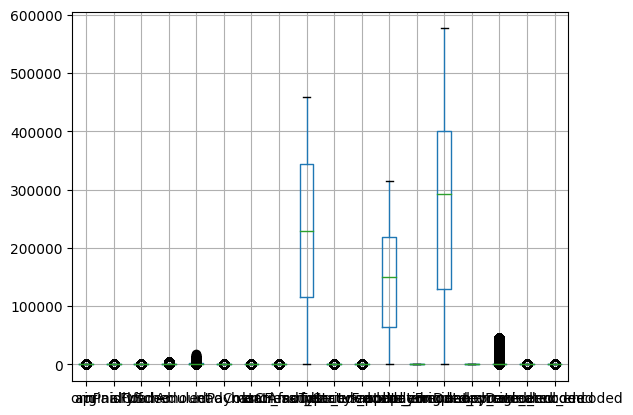

In [191]:
import matplotlib.pyplot as plt

data.boxplot()  # Box plot to identify outliers
plt.show()

In [200]:
from scipy import stats

# Assuming 'merged_data' is your DataFrame
numerical_columns = merged_data.select_dtypes(include=['number']).columns

# Save the 'loanId' column
loanId_column = merged_data['loanId']

# Drop 'loanId' from the DataFrame before calculating Z-scores
merged_data_numerical = merged_data[numerical_columns]
z_scores = stats.zscore(merged_data_numerical)
abs_z_scores = np.abs(z_scores)

# Identify outliers based on Z-scores
outliers = (abs_z_scores > 3).all(axis=1)

# Add 'loanId' column back to the DataFrame
merged_data_outliers = pd.concat([loanId_column, merged_data_numerical, pd.Series(outliers, name='is_outlier')], axis=1)


In [201]:
outliers

0         False
1         False
2         False
3         False
4         False
          ...  
300301    False
300302    False
300303    False
300304    False
300305    False
Length: 300306, dtype: bool

In [202]:
# Assuming 'merged_data_outliers' is your DataFrame after outlier detection
outliers_df = merged_data_outliers[merged_data_outliers['is_outlier']]
print(outliers_df)


Empty DataFrame
Columns: [loanId, apr, nPaidOff, isFunded, loanAmount, originallyScheduledPaymentAmount, leadCost, hasCF, loan_fraud, anon-ssn_encoded, leadType_encoded, fpStatus_encoded, clarityFraudId_encoded, state_encoded, applicationDate_encoded, payFrequency_encoded, originatedDate_encoded, approved_encoded, originated_encoded, installmentIndex, principal, fees, paymentAmount, paymentDate_encoded, paymentStatus_encoded, paymentReturnCode_encoded, is_outlier]
Index: []

[0 rows x 27 columns]


In [203]:
# Assuming 'merged_data' is your DataFrame
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Exclude non-numeric and target columns
columns_to_normalize = [col for col in numeric_columns if col not in ['loan_fraud', 'loanId']]


In [205]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'merged_data' is your DataFrame
# Select only the columns you want to normalize (excluding non-numeric and target columns)
columns_to_normalize = ['apr', 'nPaidOff', 'loanAmount', 'originallyScheduledPaymentAmount', 'leadCost']

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
merged_data[columns_to_normalize] = scaler.fit_transform(merged_data[columns_to_normalize])

# Now, 'merged_data' contains the normalized data


<ipython-input-206-e0b07001757f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


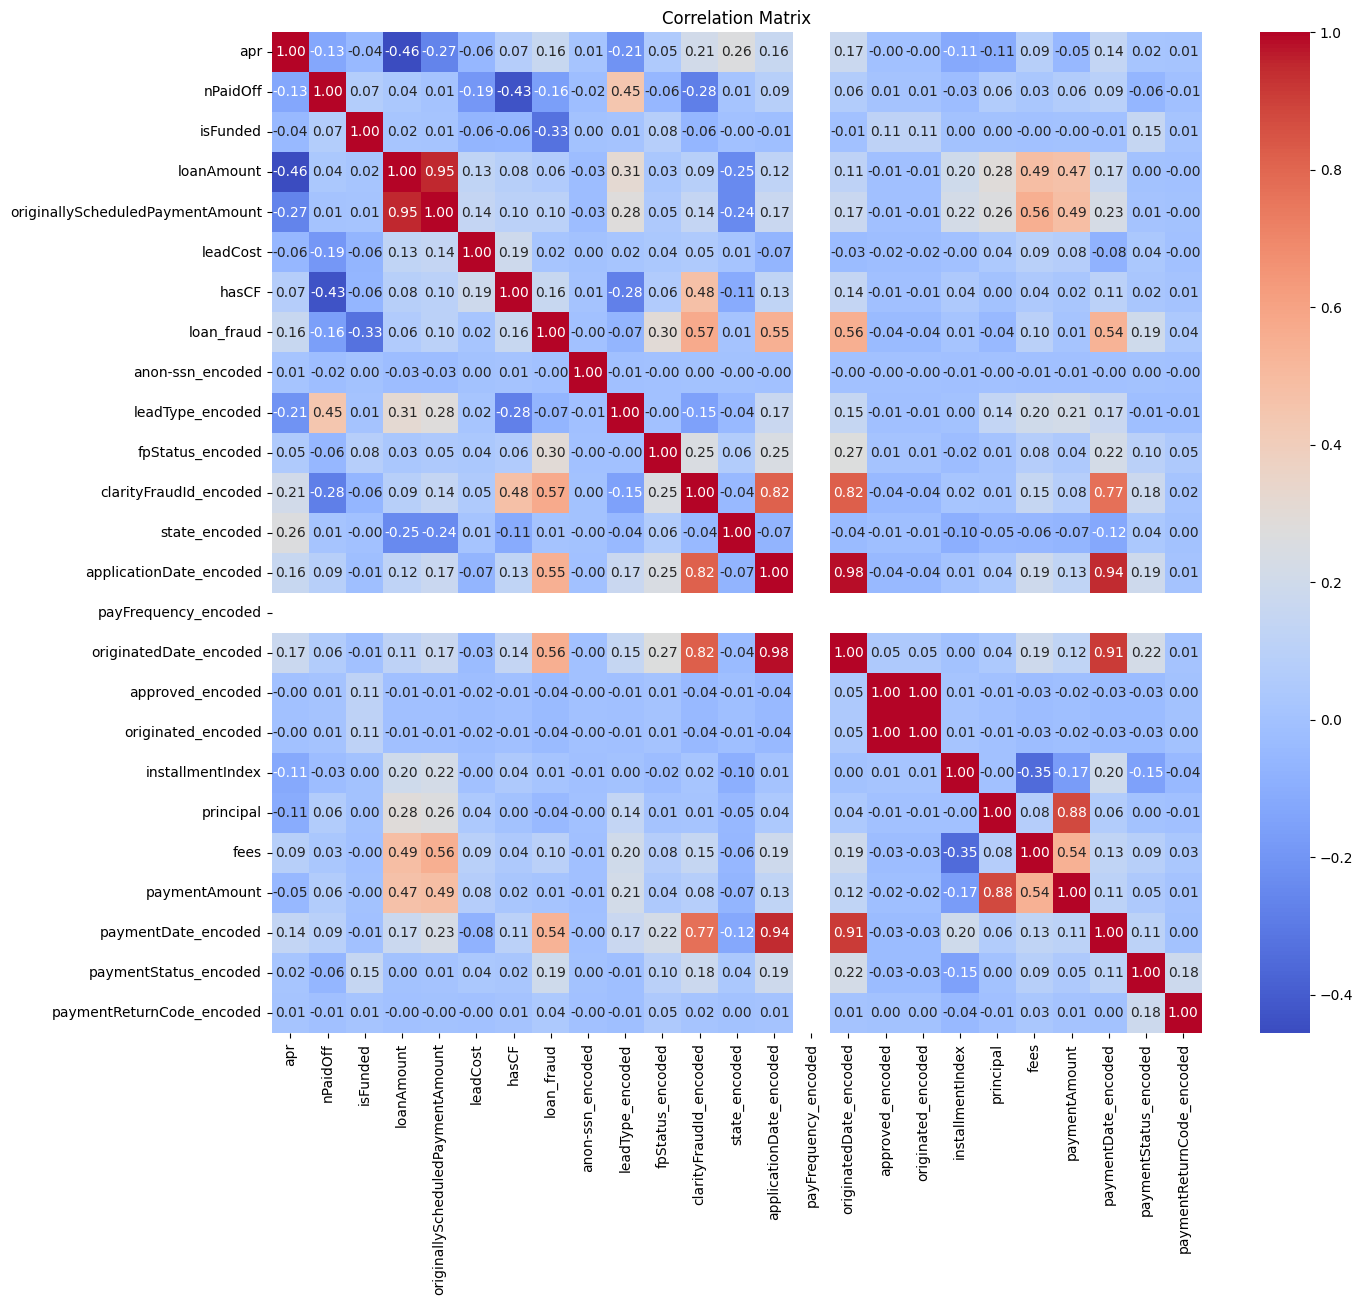

In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the variables
correlation_matrix = merged_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [209]:
S = merged_data

In [212]:
# Specify the columns to keep
columns_to_keep = ['originatedDate_encoded', 'applicationDate_encoded', 'clarityFraudId_encoded', 'isFunded', 'nPaidOff']

# Create a new DataFrame 'S' with only the specified columns
S = data[columns_to_keep].copy()

# Drop all other columns from the original DataFrame 'data'
data.drop(data.columns.difference(columns_to_keep), axis=1, inplace=True)

# Now, 'S' contains the specified columns, and 'data' has only these columns as well


In [213]:
merged_data.head()

,loanId,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,loan_fraud,anon-ssn_encoded,...,originatedDate_encoded,approved_encoded,originated_encoded,installmentIndex,principal,fees,paymentAmount,paymentDate_encoded,paymentStatus_encoded,paymentReturnCode_encoded
0,LL-I-06644937,0.282033,0.0,1,0.632221,0.373639,0.0,1,0.0,126372,...,11507,1,1,1,151.98,114.49,266.47,1923,1,7
1,LL-I-06644937,0.282033,0.0,1,0.632221,0.373639,0.0,1,0.0,126372,...,11507,1,1,2,49.08,217.39,266.47,2254,1,7
2,LL-I-06644937,0.282033,0.0,1,0.632221,0.373639,0.0,1,0.0,126372,...,11507,1,1,3,52.83,213.64,266.47,2792,1,7
3,LL-I-06644937,0.282033,0.0,1,0.632221,0.373639,0.0,1,0.0,126372,...,11507,1,1,4,56.86,209.61,266.47,3237,1,7
4,LL-I-06644937,0.282033,0.0,1,0.632221,0.373639,0.0,1,0.0,126372,...,11507,1,1,5,61.20,205.27,266.47,3605,1,7


<ipython-input-190-e0b07001757f>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


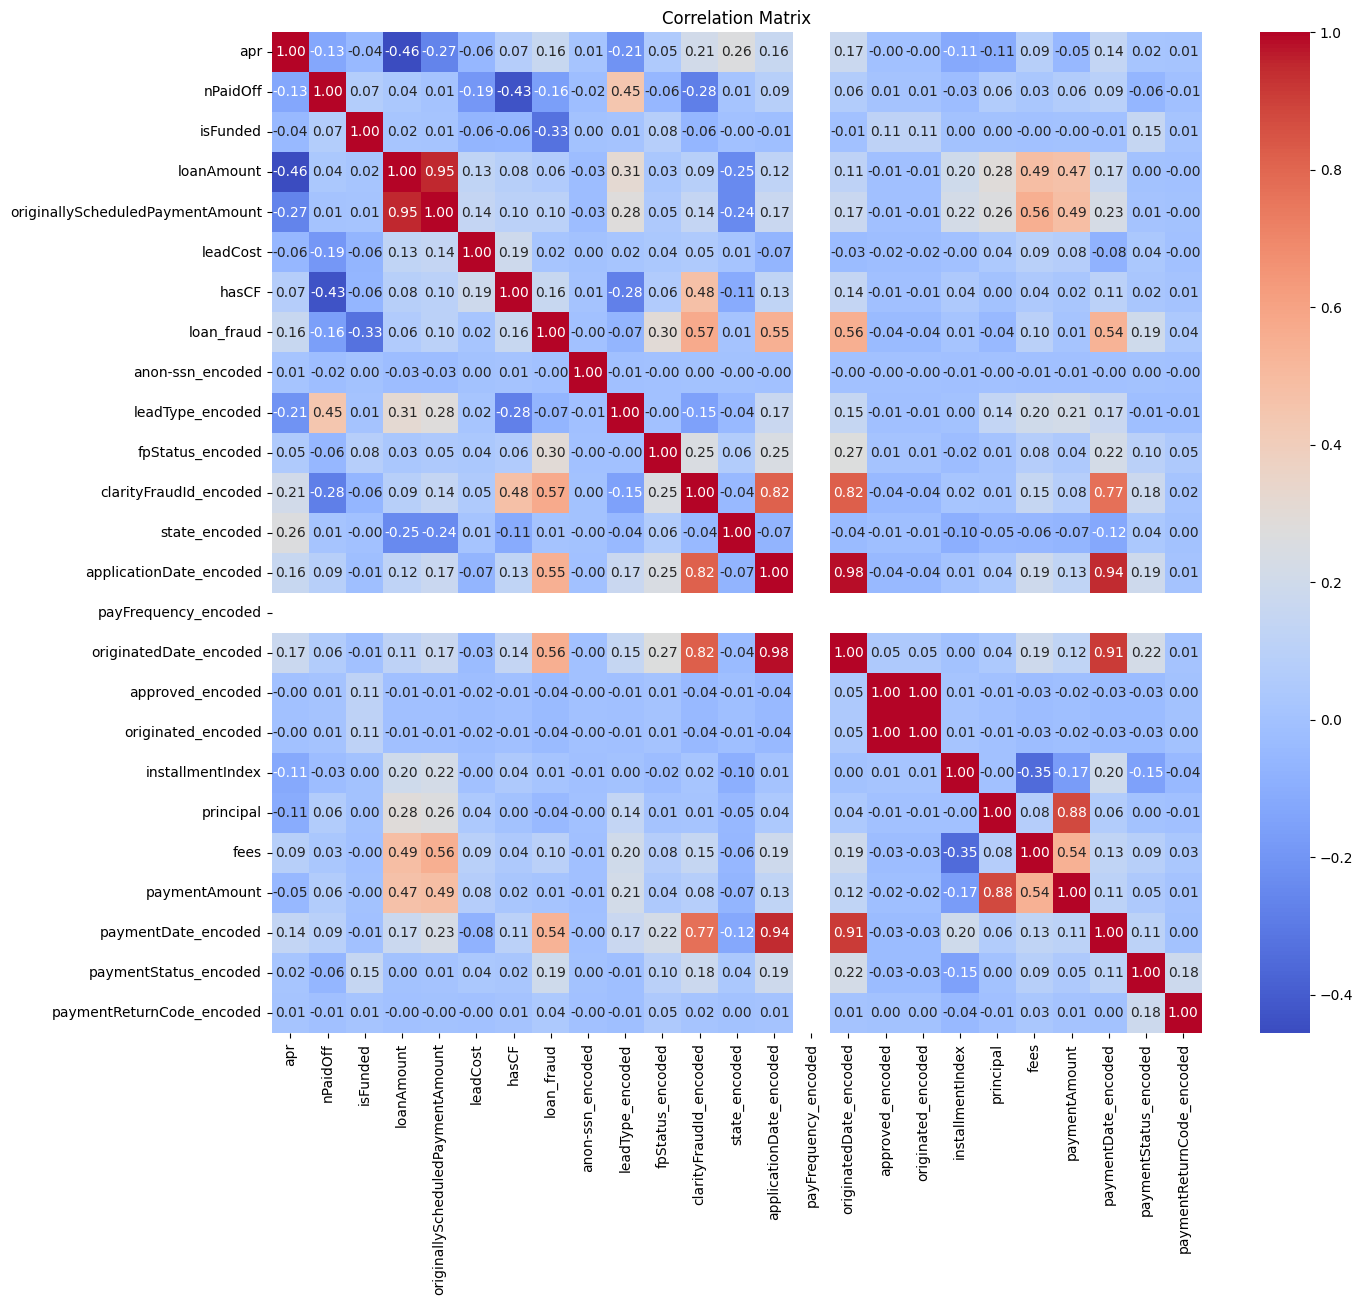

In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the variables
correlation_matrix = merged_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
merged_data.head()

,loanId,apr,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,leadCost,hasCF,loan_fraud,anon-ssn_encoded,...,originatedDate_encoded,approved_encoded,originated_encoded,installmentIndex,principal,fees,paymentAmount,paymentDate_encoded,paymentStatus_encoded,paymentReturnCode_encoded
0,LL-I-06644937,199.0,0.0,1,3000.0,6395.19,0,1.0,0.0,50061,...,3997,1,1,1,151.98,114.49,266.47,1923,1,7
1,LL-I-06644937,199.0,0.0,1,3000.0,6395.19,0,1.0,0.0,50061,...,3997,1,1,2,49.08,217.39,266.47,2254,1,7
2,LL-I-06644937,199.0,0.0,1,3000.0,6395.19,0,1.0,0.0,50061,...,3997,1,1,3,52.83,213.64,266.47,2792,1,7
3,LL-I-06644937,199.0,0.0,1,3000.0,6395.19,0,1.0,0.0,50061,...,3997,1,1,4,56.86,209.61,266.47,3237,1,7
4,LL-I-06644937,199.0,0.0,1,3000.0,6395.19,0,1.0,0.0,50061,...,3997,1,1,5,61.20,205.27,266.47,3605,1,7


In [ ]:
merged_data.shape

(104505, 26)

In [ ]:
data['loan_fraud'].unique()

In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score



/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [217]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming 'merged_data' is your original dataframe
# Drop 'loan_fraud' and 'loanId' columns
X = merged_data.drop(columns=['loan_fraud', 'loanId'])
y = merged_data['loan_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9095601212080849


In [218]:
# Assuming 'merged_data' is your original dataframe
# Drop 'loan_fraud' and 'loanId' columns
X_test = merged_data.drop(columns=['loan_fraud', 'loanId'])
y_test = merged_data['loan_fraud']

# Handle missing values using SimpleImputer
# Fit the imputer on the training data and transform the test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Assuming you have already trained your model and named it 'model'
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.9123993526602865


In [219]:
data3 = pd.read_csv('/content/loans2.csv')

In [220]:
data4 = pd.read_csv('/content/payments2.csv')

In [222]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loanId                            1000 non-null   object 
 1   anon_ssn                          1000 non-null   object 
 2   payFrequency                      1000 non-null   object 
 3   apr                               1000 non-null   float64
 4   applicationDate                   1000 non-null   object 
 5   originated                        1000 non-null   bool   
 6   originatedDate                    999 non-null    object 
 7   nPaidOff                          1000 non-null   int64  
 8   approved                          1000 non-null   bool   
 9   isFunded                          1000 non-null   int64  
 10  loanAmount                        1000 non-null   int64  
 11  originallyScheduledPaymentAmount  1000 non-null   float64
 12  state  

In [223]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16645 entries, 0 to 16644
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loanId             16645 non-null  object 
 1   installmentIndex   16645 non-null  int64  
 2   isCollection       16645 non-null  bool   
 3   paymentDate        16645 non-null  object 
 4   principal          16645 non-null  float64
 5   fees               16645 non-null  float64
 6   paymentAmount      16645 non-null  float64
 7   paymentStatus      16645 non-null  object 
 8   paymentReturnCode  450 non-null    object 
dtypes: bool(1), float64(3), int64(1), object(4)
memory usage: 1.0+ MB


In [225]:
# Assuming 'data' is your DataFrame and 'float_column' is the column with missing values
mean_value = data3['apr'].mean()
data3['apr'].fillna(mean_value, inplace=True)

In [226]:
# Assuming 'data' is your DataFrame and 'letter_column' is the column with missing values
mode_value = data3['payFrequency'].mode()[0]
data3['payFrequency'].fillna(mode_value, inplace=True)

In [227]:
print(data3.isnull().sum())

loanId                                0
anon_ssn                              0
payFrequency                          0
apr                                   0
applicationDate                       0
originated                            0
originatedDate                        1
nPaidOff                              0
approved                              0
isFunded                              0
loanAmount                            0
originallyScheduledPaymentAmount      0
state                                 0
leadType                              0
leadCost                              0
fpStatus                             46
clarityFraudId                      158
hasCF                                 0
dtype: int64


In [228]:
print(data4.isnull().sum())

loanId                   0
installmentIndex         0
isCollection             0
paymentDate              0
principal                0
fees                     0
paymentAmount            0
paymentStatus            0
paymentReturnCode    16195
dtype: int64


In [229]:
data3.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.00,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,1000,2554.26,MO,lead,40,Checked,58ab2121e4b0bf80497352a1,1
1,LL-I-04691446,668113dbf9ec99c1f7c83611dc35bd96,W,601.00,2015-11-16T20:44:10.919000,True,2015-11-17T15:14:41.516000,0,True,1,600,1826.00,NC,bvMandatory,6,Checked,564a4a64e4b033d9d5fce6a4,1
2,LL-I-04764159,8cf11204acfbbb4cd32e97b3b8b543ce,B,475.00,2015-11-18T19:32:31.613000,True,2015-11-18T19:47:28.382000,1,True,1,800,1883.93,OH,organic,0,Checked,5562061fe4b0d883ad962063,1
3,LL-I-05111303,f51e12172a176fa2f9b3bd70b7ac55be,W,601.00,2015-11-29T19:22:45.369000,True,2015-11-29T23:10:58.532000,0,True,1,600,1834.92,NC,lead,25,Checked,565b507fe4b0819f397e90d7,1
4,LL-I-04967757,e72b72f3186f4d2bd9be331de6512d57,B,449.99,2015-11-24T19:04:46.689000,True,2015-11-24T21:27:09.487000,0,True,1,800,1617.37,WI,lead,40,Checked,5654b4c3e4b0819f351f3567,1


In [232]:
data3.shape

(1000, 18)

In [233]:
data4.shape

(16645, 9)

In [234]:
merged_data.shape

(300306, 26)

In [ ]:
# Assuming 'data' is your DataFrame and 'string_column' is the column with missing values
mode_value = data3['clarityFraudId'].mode()[0]
data3['clarityFraudId'].fillna(mode_value, inplace=True)

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier(max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



Accuracy: 0.8915841347303957


In [230]:
# Assuming 'data' is your DataFrame and 'string_column' is the column with missing values
mode_value = data3['clarityFraudId'].mode()[0]
data3['clarityFraudId'].fillna(mode_value, inplace=True)

In [235]:
# Assuming 'data' is your DataFrame and 'string_column' is the column with missing values
mode_value = data4['paymentReturnCode'].mode()[0]
data4['paymentReturnCode'].fillna(mode_value, inplace=True)

In [238]:
label_encoder = LabelEncoder()
data3['anon_ssn_encoded'] = label_encoder.fit_transform(data3['anon_ssn'])



In [239]:
data3.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,anon_ssn_encoded
0,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.00,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,1000,2554.26,MO,lead,40,Checked,58ab2121e4b0bf80497352a1,1,753
1,LL-I-04691446,668113dbf9ec99c1f7c83611dc35bd96,W,601.00,2015-11-16T20:44:10.919000,True,2015-11-17T15:14:41.516000,0,True,1,600,1826.00,NC,bvMandatory,6,Checked,564a4a64e4b033d9d5fce6a4,1,380
2,LL-I-04764159,8cf11204acfbbb4cd32e97b3b8b543ce,B,475.00,2015-11-18T19:32:31.613000,True,2015-11-18T19:47:28.382000,1,True,1,800,1883.93,OH,organic,0,Checked,5562061fe4b0d883ad962063,1,519
3,LL-I-05111303,f51e12172a176fa2f9b3bd70b7ac55be,W,601.00,2015-11-29T19:22:45.369000,True,2015-11-29T23:10:58.532000,0,True,1,600,1834.92,NC,lead,25,Checked,565b507fe4b0819f397e90d7,1,938
4,LL-I-04967757,e72b72f3186f4d2bd9be331de6512d57,B,449.99,2015-11-24T19:04:46.689000,True,2015-11-24T21:27:09.487000,0,True,1,800,1617.37,WI,lead,40,Checked,5654b4c3e4b0819f351f3567,1,881


In [244]:

label_encoder = LabelEncoder()
data3['clarityFraudId'] = label_encoder.fit_transform(data3['clarityFraudId'])


In [243]:

label_encoder = LabelEncoder()
data3['originatedDate_encoded'] = label_encoder.fit_transform(data3['originatedDate'])


In [245]:
# Assuming 'loan_application_data' and 'payment_data' are your DataFrames
merged_data2 = pd.merge(data3, data4, on='loanId', how='inner')


In [247]:
merged_data2.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,applicationDate_encoded,originatedDate_encoded,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.0,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,...,922,922,1,False,2017-03-03T05:00:00,66.33,130.14,196.47,Checked,R01
1,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.0,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,...,922,922,2,False,2017-03-17T04:00:00,26.36,170.11,196.47,Pending,R01
2,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.0,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,...,922,922,3,False,2017-03-31T04:00:00,31.17,165.30,196.47,None,R01
3,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.0,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,...,922,922,4,False,2017-04-14T04:00:00,36.84,159.63,196.47,None,R01
4,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.0,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,...,922,922,5,False,2017-04-28T04:00:00,43.56,152.91,196.47,None,R01


<ipython-input-109-e62369d5ba40>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data.corr()


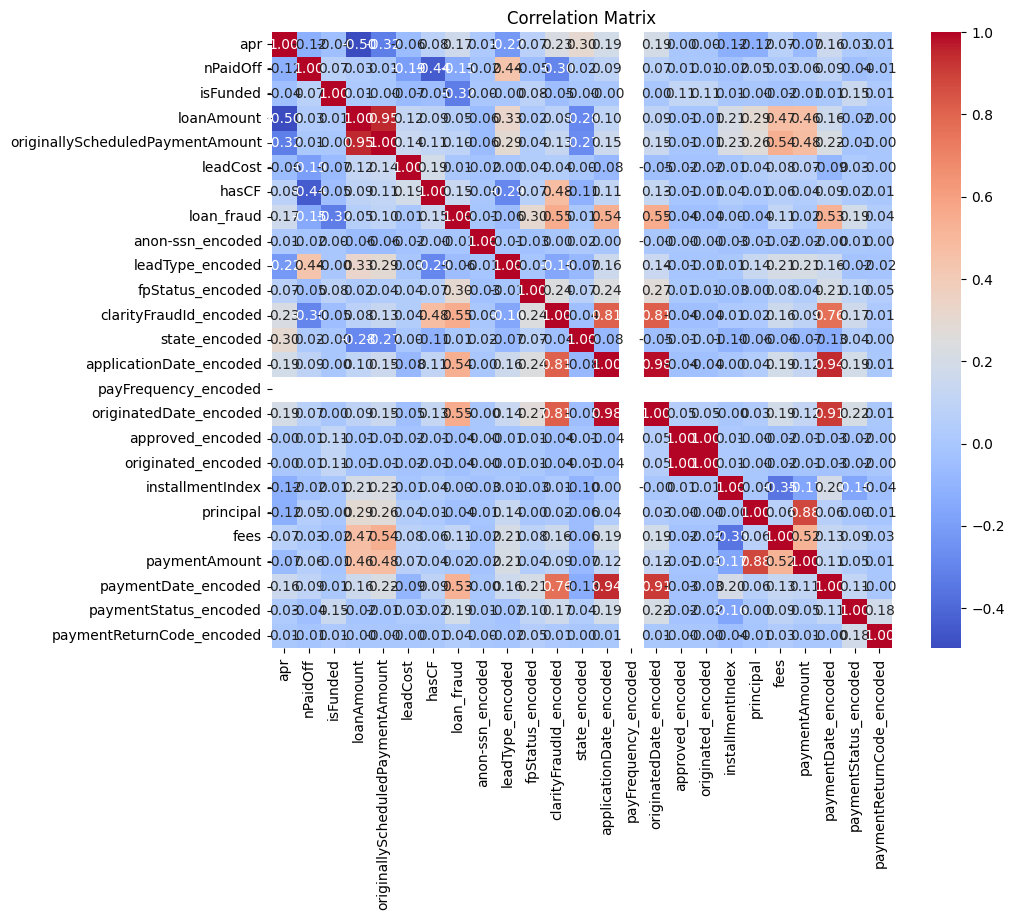

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the variables
correlation_matrix = merged_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [251]:
# Specify the columns to keep
columns_to_keep = ['originatedDate_encoded', 'applicationDate_encoded', 'isFunded', 'nPaidOff']

# Create a new DataFrame 'S' with only the specified columns
SA = merged_data2[columns_to_keep].copy()

# Drop all other columns from the original DataFrame 'data'
merged_data2.drop(data.columns.difference(columns_to_keep), axis=1, inplace=True)

# Now, 'S' contains the specified columns, and 'data' has only these columns as well

KeyError: "['clarityFraudId_encoded'] not found in axis"

In [252]:
merged_data2.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,...,applicationDate_encoded,originatedDate_encoded,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.0,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,...,922,922,1,False,2017-03-03T05:00:00,66.33,130.14,196.47,Checked,R01
1,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.0,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,...,922,922,2,False,2017-03-17T04:00:00,26.36,170.11,196.47,Pending,R01
2,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.0,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,...,922,922,3,False,2017-03-31T04:00:00,31.17,165.30,196.47,None,R01
3,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.0,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,...,922,922,4,False,2017-04-14T04:00:00,36.84,159.63,196.47,None,R01
4,LL-I-17438410,c9448f6494e012f94d8aef9a9bb10534,B,475.0,2017-02-20T17:02:28.419000,True,2017-02-20T17:15:05.712000,0,True,1,...,922,922,5,False,2017-04-28T04:00:00,43.56,152.91,196.47,None,R01


In [254]:
columns_to_drop = ['anon_ssn', 'originated', 'approved' , 'fees' , 'paymentStatus' , 'paymentAmount']  # Replace with the actual names of the columns

# Drop the specified columns
merged_data2.drop(columns=columns_to_drop, inplace=True)

In [255]:
merged_data2.head()

,loanId,payFrequency,apr,applicationDate,originatedDate,nPaidOff,isFunded,loanAmount,originallyScheduledPaymentAmount,state,...,clarityFraudId,hasCF,anon_ssn_encoded,applicationDate_encoded,originatedDate_encoded,installmentIndex,isCollection,paymentDate,principal,paymentReturnCode
0,LL-I-17438410,B,475.0,2017-02-20T17:02:28.419000,2017-02-20T17:15:05.712000,0,1,1000,2554.26,MO,...,772,1,753,922,922,1,False,2017-03-03T05:00:00,66.33,R01
1,LL-I-17438410,B,475.0,2017-02-20T17:02:28.419000,2017-02-20T17:15:05.712000,0,1,1000,2554.26,MO,...,772,1,753,922,922,2,False,2017-03-17T04:00:00,26.36,R01
2,LL-I-17438410,B,475.0,2017-02-20T17:02:28.419000,2017-02-20T17:15:05.712000,0,1,1000,2554.26,MO,...,772,1,753,922,922,3,False,2017-03-31T04:00:00,31.17,R01
3,LL-I-17438410,B,475.0,2017-02-20T17:02:28.419000,2017-02-20T17:15:05.712000,0,1,1000,2554.26,MO,...,772,1,753,922,922,4,False,2017-04-14T04:00:00,36.84,R01
4,LL-I-17438410,B,475.0,2017-02-20T17:02:28.419000,2017-02-20T17:15:05.712000,0,1,1000,2554.26,MO,...,772,1,753,922,922,5,False,2017-04-28T04:00:00,43.56,R01


In [256]:
columns_to_drop = ['payFrequency', 'apr', 'loanAmount' , 'state' , 'hasCF' , 'principal']  # Replace with the actual names of the columns

# Drop the specified columns
merged_data2.drop(columns=columns_to_drop, inplace=True)

In [262]:
from sklearn.metrics import median_absolute_error


model.fit(X_train, y_train)


y_pred = model.predict(X_test)






In [263]:
y_pred

array([0., 0., 0., ..., 0., 1., 1.])

In [127]:
# Assuming 'merged_data' is your original dataframe
# Drop 'loan_fraud' and 'loanId' columns
X_test = merged_data.drop(columns=['loan_fraud', 'loanId'])
y_test = merged_data['loan_fraud']

# Handle missing values using SimpleImputer
# Fit the imputer on the training data and transform the test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Assuming you have already trained your model and named it 'model'
# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.9295249031146835


In [265]:
# Assuming 'submission_df' is your submission DataFrame, and 'other_dataset' is the other dataset
merged_submission = pd.merge(submission_df, merged_data2, on='loanId', how='inner')

# Now 'merged_submission' contains the shared IDs and columns from both datasets


KeyError: 'loanId'

In [266]:
# Assuming 'y_pred' contains your predictions
submission_df = pd.read_csv("/content/subsub.csv")
submission_df['prediction'] = y_test
submission_df.to_csv('submission.csv', index=False)


In [267]:
# Assuming 'submission_df' is your submission DataFrame, and 'other_dataset' is the other dataset
merged_submission = pd.merge(submission_df, merged_data2, on='loanId', how='inner')

# Now 'merged_submission' contains the shared IDs and columns from both datasets


In [268]:
merged_submission.shape

(16645, 18)

In [282]:
X = merged_data2.drop(columns=['loanId'])
y = merged_data['loan_fraud' ]

# Assuming 'X' is your feature matrix and 'loan_fraud' is your target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


ValueError: Found input variables with inconsistent numbers of samples: [16645, 300306]

In [269]:
data3.shape

(1000, 21)

In [270]:
data4.shape

(16645, 9)

In [271]:
# Assuming 'submission_df' is your submission DataFrame, and 'other_dataset' is the other dataset
merged_submission = pd.merge(submission_df, data3, on='loanId', how='inner')

# Now 'merged_submission' contains the shared IDs and columns from both datasets

In [272]:
merged_submission.shape

(1000, 22)

In [273]:
model.fit(X_train, y_train)


y_pred = model.predict(merged_submission)




ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- anon_ssn
- anon_ssn_encoded
- applicationDate
- approved
- clarityFraudId
- ...
Feature names seen at fit time, yet now missing:
- anon-ssn_encoded
- approved_encoded
- clarityFraudId_encoded
- fees
- fpStatus_encoded
- ...


In [278]:
# Assuming 'model' is already trained
# Assuming 'merged_submission' is your prediction dataset

# Select only the relevant features used during training
selected_features = X_train.columns.tolist()  # Replace with the actual feature names used during training
merged_submission_selected = merged_submission[selected_features]

# Make predictions
y_pred = model.predict(merged_submission_selected)


In [280]:
y_pred.shape

(1000,)

In [276]:
columns_to_drop = ['anon-ssn_encoded', 'leadType_encoded', 'fpStatus_encoded', 'clarityFraudId_encoded', 'state_encoded', 'payFrequency_encoded', 'approved_encoded', 'originated_encoded', 'installmentIndex', 'principal', 'fees', 'paymentAmount', 'paymentDate_encoded', 'paymentStatus_encoded', 'paymentReturnCode_encoded']  # Replace with the actual names of the columns

# Drop the specified columns
X_train.drop(columns=columns_to_drop, inplace=True)

In [279]:
model.fit(X_train, y_train)


y_pred = model.predict(merged_submission)



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- anon_ssn
- anon_ssn_encoded
- applicationDate
- approved
- clarityFraudId
- ...


In [281]:
import pandas as pd

# Assuming 'merged_data' is your DataFrame
X_test_imputed = imputer.transform(X_test)  # Assuming imputer is already defined

# Make predictions on the test set
y_pred_test = model.predict(X_test_imputed)

# Create a DataFrame with 'id' and predicted values
result_df = pd.DataFrame({'id': X_test['loanId_encoded'], 'prediction': y_pred_test})

# Convert the DataFrame to a list of tuples
result_vector = list(result_df.itertuples(index=False, name=None))

# Display the result
print(result_vector)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 24 features, but HistGradientBoostingClassifier is expecting 9 features as input.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming 'merged_data' is your DataFrame
X = merged_data.drop(columns=['loan_fraud'])
y = merged_data['loan_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_lr = classification_report(y_test, y_pred)
confusion_matrix_lr = confusion_matrix(y_test, y_pred)

print(f'Model Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_report_lr}')
print(f'Confusion Matrix:\n{confusion_matrix_lr}')

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'LL-I-12635552'